# <center> PROCESAMIENTO DIGITAL DE SEÑALES DE AUDIO</center>
## <center> Ventanas suavizantes</center>      

In [1]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.io import wavfile

import IPython.display as ipd

### Descripción

Este ejercicio busca ser una introducción al uso de **ventanas suavizantes**.

La tarea planteada consiste en comparar el uso de diferentes **ventanas suavizantes** para análisis de una señal.  

### Cómo correr el notebook
Se puede bajar y correr el notebook de forma local en una computadora.

O también se puede correr en Google Colab usando el siguiente enlace. 

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/notebooks/audioDSP-short_time_example.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

### Ventana suavizante

La siguiente celda define una ventana suavizante, usando dos largos diferentes. Compare el efecto del largo en la forma de la ventana y compare diferentes tipos de ventanas.

In [9]:
# sampling rate
fs = 8000

# window length 1
N = 128
# window length 2
N2 = 256

# DFT points (for window 1)
NFFT = 4*N
# DFT points (for window 2)
NFFT2 = 4*N2

# time instants
t = np.linspace(0, N, N, endpoint=False)/fs
t2 = np.linspace(0, N2, N2, endpoint=False)/fs

# analysis frequency
f1 = fs/4

# frequency values
f  = np.linspace(0, NFFT/2, int(NFFT/2+1))/NFFT
f2  = np.linspace(0, NFFT2/2, int(NFFT2/2+1))/NFFT2

# analysis window
window = signal.windows.get_window('hann', N)
window2 = signal.windows.get_window('hann', N2)

# normalization factor
norm = 2/sum(window)
norm2 = 2/sum(window2)

# sinusoid
x = np.sin(2*np.pi*f1*t)
x2 = np.sin(2*np.pi*f1*t2)

Xwin = norm * np.fft.fft(x*window,NFFT)
Xwin2 = norm * np.fft.fft(x2*window2, NFFT2)

In [28]:
Xwin.shape

(512,)

In [30]:
f.shape

(257,)

Text(0.5, 1.0, 'Analysis window 256')

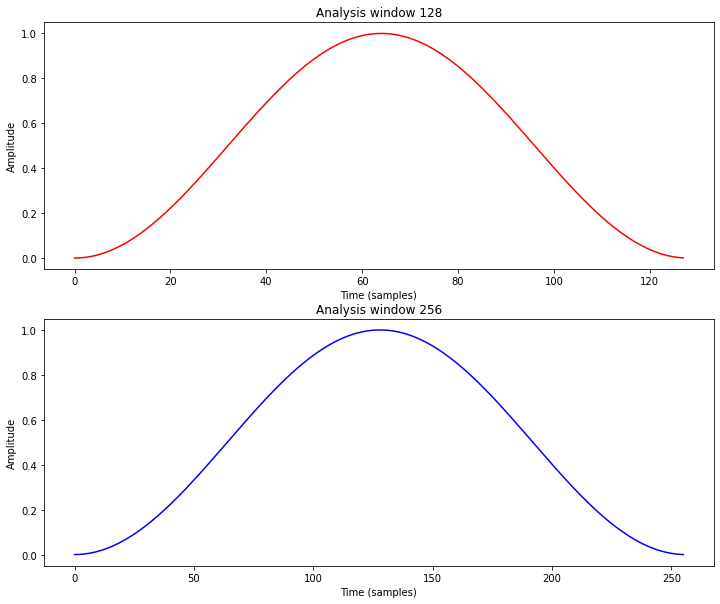

In [14]:
# plot the analysis window
plt.figure(figsize=(12,10))
ax1 = plt.subplot(2, 1, 1)
plt.plot(window, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time (samples)')
plt.title(f'Analysis window {N}')
plt.subplot(2,1,2)
plt.plot(window2, 'b')
plt.ylabel('Amplitude')
plt.xlabel('Time (samples)')
plt.title(f'Analysis window {N2}')

### A continuación
Realize las tareas propuestas a continuación. 

  1. Compare el espectro de las diferentes ventanas.
  2. Compare el uso de diferentes ventanas para resolver dos componentes cercanos en frecuencia. 


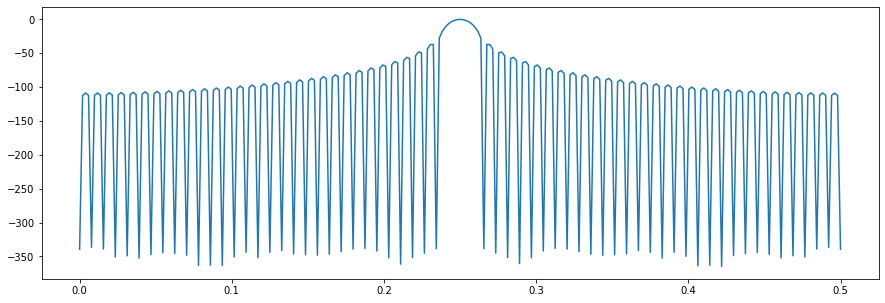

In [37]:
plt.figure(figsize=(15,5))
plt.plot(f, 10*np.log(abs(Xwin[0:NFFT//2+1])))
plt.show()

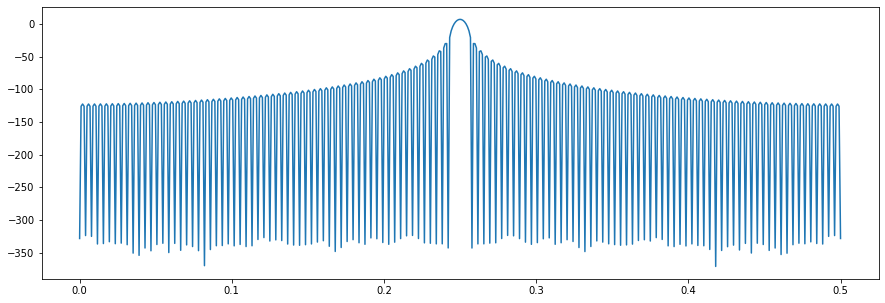

In [36]:
plt.figure(figsize=(15,5))
plt.plot(f2, 10*np.log(abs(Xwin2[0:NFFT2//2+1])))
plt.show()

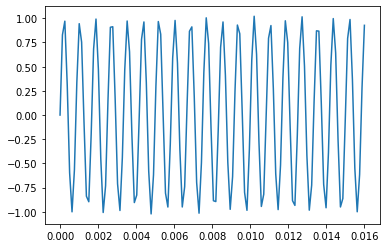

In [71]:
t = np.linspace(0, N, N)/fs
t2 = np.linspace(0, N2, N2)/fs
x = 0.025 * np.sin(2*np.pi*(0.1*fs)*t) + np.sin(2*np.pi*(0.15*fs)*t)
x2 = 0.025 * np.sin(2*np.pi*(0.1*fs)*t2) + np.sin(2*np.pi*(0.15*fs)*t2)
plt.plot(t,x)
plt.show()

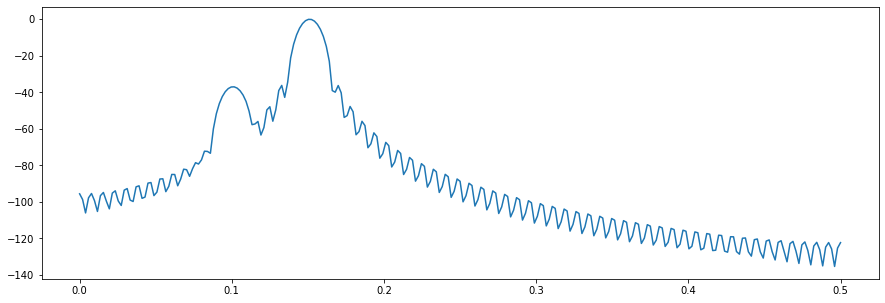

In [72]:
Xwin = norm * np.fft.fft(x*window,NFFT)
Xwin2 = norm * np.fft.fft(x2*window2, NFFT2)

plt.figure(figsize=(15,5))
plt.plot(f, 10*np.log(abs(Xwin[0:NFFT//2+1])))
plt.show()

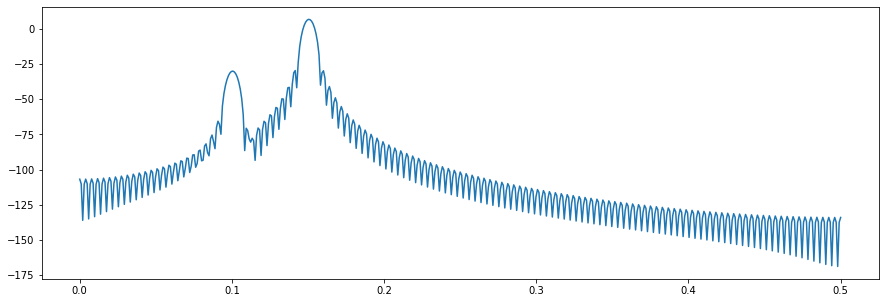

In [73]:
plt.figure(figsize=(15,5))
plt.plot(f2, 10*np.log(abs(Xwin2[0:NFFT2//2+1])))
plt.show()